## 2.0 Time series clustering

In this notebook we try to cluster the hole dataset, using the model trained in the previous one

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from tensorflow.keras import layers, Model
import tensorflow as tf
from tslearn.clustering import TimeSeriesKMeans
from tslearn.barycenters import dtw_barycenter_averaging as dtw_avg
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline   

In [2]:
df = np.empty((len(os.listdir('../test_data/new_data/')),385,4))
pixels = []
i = 0



for file in os.listdir('../test_data/new_data/'):
    df[i,:,:] = pd.read_csv(os.path.join('../test_data/new_data/', file), header=None)
    i += 1
    pixels.append(file)
    
df = df[:,1:,:]

In [3]:
data = encoder.predict(df)
data = data.reshape((len(os.listdir('../test_data/new_data/')), 384))

data = pd.DataFrame(data, index = pixels)

409/409 [==============================] - 1s 2ms/step


In [4]:
df2 = np.empty((len(os.listdir('../test_data/assaig1/')),385,4))
i = 0



for file in os.listdir('../test_data/assaig1/'):
    df2[i,:,:] = pd.read_csv(os.path.join('../test_data/assaig1/', file), header=None)
    i += 1
    
df2 = df2[:,1:,:]

In [5]:
data2 = encoder.predict(df2)
data2 = data2.reshape((len(os.listdir('../test_data/assaig1/')), 384))

data2 = pd.DataFrame(data2)

6/6 [==============================] - 0s 3ms/step


In [6]:
model = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=10000)
model.fit(data2)

TimeSeriesKMeans(max_iter=10000, metric='dtw', n_clusters=7)

In [7]:
results = pd.DataFrame()
results['group'] = model.predict(data)

coord_x = []
coord_y = []

for i in range(len(pixels)):
    pixels[i] = pixels[i].replace('.csv', '')
    coord_x.append(float(pixels[i].split(',')[1]))
    coord_y.append(float(pixels[i].split(',')[0]))

results['coord_x'] = coord_x
results['coord_y'] = coord_y

c:\Users\Usuario\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 13072 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


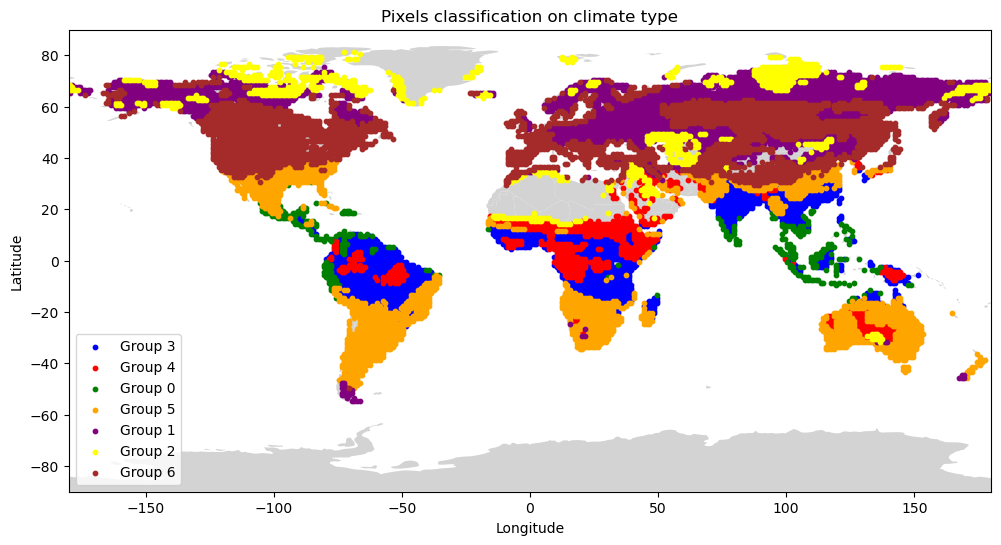

In [8]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

for group, color in zip(results['group'].unique(), ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'black', 'cyan']):
    plt.scatter(x = results.coord_x[results['group'] == group], y = results.coord_y[results['group'] == group], s = 10, color=color, label=f"Group {group}")

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title('Pixels classification on climate type')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [10]:
mean_series = np.empty((len(set(results['group'])),384,4))

for i in set(results['group']):
    for j in range(4):
        mean_series[i,:,j] = dtw_avg(df[results['group'] == i,:,j], max_iter = 100).reshape([384,])

Text(0.5, 1.0, 'Precipitation')

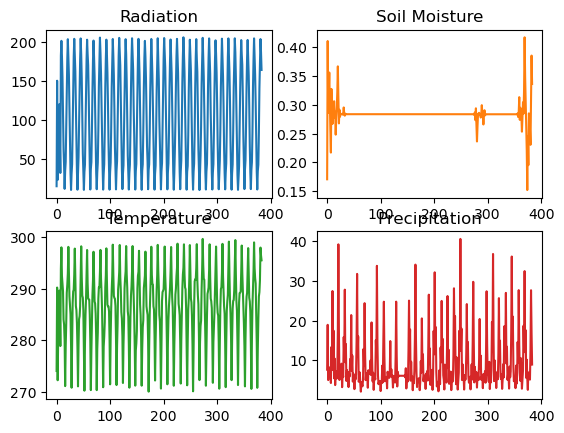

In [12]:
# Mitjana de cada variable per al cluster 3
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(mean_series[6,:,0])
axs[0, 0].set_title('Radiation')
axs[0, 1].plot(mean_series[6,:,1], 'tab:orange')
axs[0, 1].set_title('Soil Moisture')
axs[1, 0].plot(mean_series[6,:,2], 'tab:green')
axs[1, 0].set_title('Temperature')
axs[1, 1].plot(mean_series[6,:,3], 'tab:red')
axs[1, 1].set_title('Precipitation')

In [13]:
for i in range(mean_series.shape[0]):
    np.savetxt(f"{'./mean_series/'}{i}{'.txt'}", mean_series[i,:,:])